**Classification using Deep neural network (Any One from the following) Binary classification using Deep Neural Networks Example: Classify movie reviews into positiv reviews an "negativ" reviews, just based on the text content of the reviews Use IMDB dataset**

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
import matplotlib.pyplot as plt

In [2]:
max_features = 10000
maxlen = 200

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [4]:
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1638464   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2918529 (11.13 MB)
Trainable params: 2918529 (11.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 20s 65ms/step - loss: 2.2090e-04 - accuracy: 1.0000 - val_loss: 0.6111 - val_accuracy: 0.8704
Epoch 2/10
313/313 [==============================] - 23s 75ms/step - loss: 1.7339e-04 - accuracy: 1.0000 - val_loss: 0.6292 - val_accuracy: 0.8690
Epoch 3/10
313/313 [==============================] - 26s 83ms/step - loss: 1.9959e-04 - accuracy: 0.9999 - val_loss: 0.6505 - val_accuracy: 0.8622
Epoch 4/10
313/313 [==============================] - 27s 86ms/step - loss: 1.8245e-04 - accuracy: 1.0000 - val_loss: 0.6631 - val_accuracy: 0.8698
Epoch 5/10
313/313 [==============================] - 25s 80ms/step - loss: 8.8102e-05 - accuracy: 1.0000 - val_loss: 0.6772 - val_accuracy: 0.8688
Epoch 6/10
313/313 [==============================] - 22s 70ms/step - loss: 8.5159e-05 - accuracy: 1.0000 - val_loss: 0.6936 - val_accuracy: 0.8706
Epoch 7/10
313/313 [==============================] - 20s 65ms/step - loss: 5.8595e-05 - accuracy: 1.0000 - val_

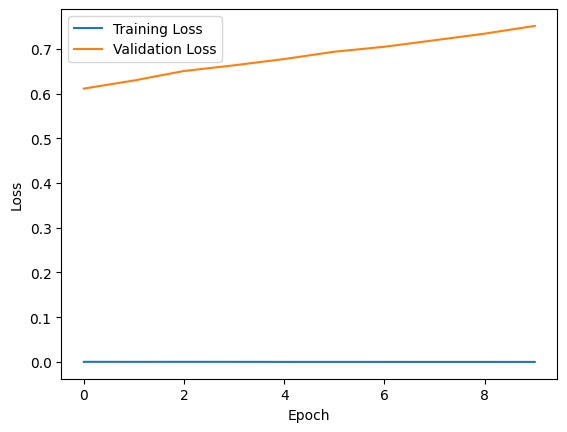

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

782/782 [==============================] - 12s 15ms/step - loss: 0.1502 - accuracy: 0.9742
Train Loss: 0.15024280548095703, Train Accuracy: 0.9741600155830383


In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

782/782 [==============================] - 10s 13ms/step - loss: 0.7451 - accuracy: 0.8671
Test Loss: 0.7450793981552124, Test Accuracy: 0.8671200275421143


In [12]:
predictions = model.predict(X_test)

782/782 [==============================] - 12s 13ms/step


In [16]:
predicted_sentiment = "Positive" if predictions[0][0] > 0.5 else "Negative"
actual_sentiment = "Positive" if y_test[0] == 1 else "Negative"

In [17]:
print("Predicted Sentiment:", predicted_sentiment)
print("Actual Sentiment:", actual_sentiment)

Predicted Sentiment: Negative
Actual Sentiment: Negative
